In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
roi = df[['InvoiceDate','UnitPrice','CustomerID']]
roi.head()

,InvoiceDate,UnitPrice,CustomerID
0,2010-12-01 08:26:00,2.55,17850
1,2010-12-01 08:26:00,3.39,17850
2,2010-12-01 08:26:00,2.75,17850
3,2010-12-01 08:26:00,3.39,17850
4,2010-12-01 08:26:00,3.39,17850


In [5]:
%%timeit
roi['yearmonth'] = roi['InvoiceDate'].apply(lambda x: (100*x.year) + x.month)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


2.27 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
roi.head()

,InvoiceDate,UnitPrice,CustomerID,yearmonth
0,2010-12-01 08:26:00,2.55,17850,201012
1,2010-12-01 08:26:00,3.39,17850,201012
2,2010-12-01 08:26:00,2.75,17850,201012
3,2010-12-01 08:26:00,3.39,17850,201012
4,2010-12-01 08:26:00,3.39,17850,201012


In [7]:
month_list = roi['yearmonth'].unique().tolist()

In [19]:
month_list

[201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

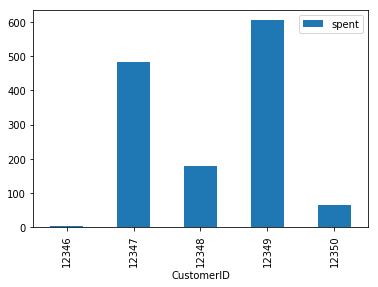

In [8]:
plt.figure(figsize=(12,6))
#plt.title("Frequency of order by Month", fontsize=15)
custVsSpent = roi.groupby(['CustomerID'])['UnitPrice'].agg(['sum']).rename(columns={'sum': 'spent'})
custVsSpent.head().sort_index().plot.bar()

In [9]:
roi.groupby(['CustomerID', 'yearmonth'])['UnitPrice'].agg(['sum'])

sum
CustomerID yearmonth         
12346      201101        2.08
12347      201012       89.59
           201101       73.17
           201104       62.29
           201106       53.62
           201108       68.24
           201110      120.76
           201112       13.54
12348      201012       49.60
           201101       42.01
           201104       44.60
           201109       42.50
12349      201111      605.10
12350      201102       65.30
12352      201102       68.35
           201103     1831.72
           201109      224.50
           201111       86.53
12353      201105       24.30
12354      201104      261.22
12355      201105       54.65
12356      201101      114.18
           201104       50.99
           201111       23.70
12357      201111      438.67
12358      201107       92.63
           201112       64.58
12359      201101      292.01
           201102      809.98
           201104       17.90
...                       ...
18272      201105       10.25
           201107      101.90
           201108       39.53
           201110       86.59
           201112       49.64
18273      201103        2.55
           201109        2.55
           201112        2.55
18274      201111       80.78
18276      201110       34.75
           201111       12.50
18277      201101       12.75
           201110       25.13
18278      201109       29.55
18280      201103       47.65
18281      201106       39.36
18282      201108       39.16
           201112       23.52
18283      201101      184.20
           201102       70.55
           201104       82.82
           201105       75.24
           201106      181.85
           201107       92.76
           201109       65.89
           201110       83.48
           201111      318.76
           201112       65.38
18287      201105       56.92
           201110       47.63

[13675 rows x 1 columns]

In [14]:
monthwise_data = roi.reset_index().groupby(['CustomerID', 'yearmonth'])['UnitPrice'].agg(['sum']).unstack().fillna(0).reset_index().rename(columns={'CustomerID' : 'cust_id'})

In [15]:
monthwise_data.head()

cust_id    sum                                                   \
yearmonth         201012 201101 201102 201103 201104 201105 201106 201107   
0           12346   0.00   2.08    0.0    0.0   0.00    0.0   0.00    0.0   
1           12347  89.59  73.17    0.0    0.0  62.29    0.0  53.62    0.0   
2           12348  49.60  42.01    0.0    0.0  44.60    0.0   0.00    0.0   
3           12349   0.00   0.00    0.0    0.0   0.00    0.0   0.00    0.0   
4           12350   0.00   0.00   65.3    0.0   0.00    0.0   0.00    0.0   

                                               
yearmonth 201108 201109  201110 201111 201112  
0           0.00    0.0    0.00    0.0   0.00  
1          68.24    0.0  120.76    0.0  13.54  
2           0.00   42.5    0.00    0.0   0.00  
3           0.00    0.0    0.00  605.1   0.00  
4           0.00    0.0    0.00    0.0   0.00

In [16]:
monthwise_data['cust_id']

0       12346
1       12347
2       12348
3       12349
4       12350
5       12352
6       12353
7       12354
8       12355
9       12356
10      12357
11      12358
12      12359
13      12360
14      12361
15      12362
16      12363
17      12364
18      12365
19      12367
20      12370
21      12371
22      12372
23      12373
24      12374
25      12375
26      12377
27      12378
28      12379
29      12380
        ...  
4342    18245
4343    18246
4344    18248
4345    18249
4346    18250
4347    18251
4348    18252
4349    18255
4350    18256
4351    18257
4352    18259
4353    18260
4354    18261
4355    18262
4356    18263
4357    18265
4358    18268
4359    18269
4360    18270
4361    18272
4362    18273
4363    18274
4364    18276
4365    18277
4366    18278
4367    18280
4368    18281
4369    18282
4370    18283
4371    18287
Name: cust_id, Length: 4372, dtype: object

In [21]:
from scipy.signal import argrelextrema
r = monthwise_data['cust_id', '201012','201101','201102','201103','201104','201105','201106','201107','201108','201109','201110','201111','201112']
maxInd = argrelextrema(r, np.greater)
row = r[maxInd]
row

KeyError: 'Key length (14) exceeds index depth (2)'